In [22]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import keras.optimizers 
import keras.losses
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout
%matplotlib inline

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
img = load_img('/content/drive/My Drive/RPS/paper/paper1.jpeg')
x = img_to_array(img)
x = x.reshape((1,)+ x.shape)

datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
i = 0
for batch in datagen.flow(x, batch_size = 1, 
                             save_to_dir = '/content/drive/My Drive/RPS',
                             save_prefix = 'rps', 
                             save_format = 'jpeg'):
    i+=1
    if i>20:
        break

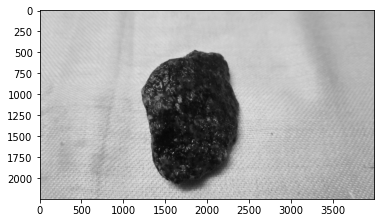

In [25]:
datadir = '/content/drive/My Drive/RPS'
categories = ['rock', 'paper', 'scissors']

for i in categories:
    path = os.path.join(datadir, i)    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [26]:
training_data = []
def create_training_data():
    for i in categories:
        path = os.path.join(datadir, i)
        class_num = categories.index(i)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (80, 80))
            training_data.append([new_array,class_num])
create_training_data()

In [27]:
len(training_data)

600

In [28]:
import random
random.shuffle(training_data)

X = []
Y = []
for features, labels in training_data:
    X.append(features)
    Y.append(labels)  
X = np.array(X).reshape(-1, 80, 80,1)

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
category = np.array(Y)
encoded = category.reshape(-1,1)
labels = ohe.fit_transform(encoded)

In [30]:
X.shape

(600, 80, 80, 1)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,labels, test_size = 0.05) 


In [32]:
print(X_train.shape, X_test.shape, Y_test.shape, Y_train.shape)

(570, 80, 80, 1) (30, 80, 80, 1) (30, 3) (570, 3)


In [33]:
X_train = X_train/255.0
X_test = X_test/255.0

In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding="valid", input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2), (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding="valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), padding="valid"))
model.add(Flatten())
model.add(Dense(3,activation="sigmoid"))
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.001,decay=1e-5)
losses = keras.losses.categorical_crossentropy
model.compile(optimizer = opt,
              loss=losses, metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 78, 78, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 37, 37, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 64)       

In [38]:
model.fit_generator(X_train, Y_train, batch_size=64, epochs=5, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Train on 570 samples, validate on 30 samples
Epoch 1/5
570/570 [==============================] - 6s 10ms/step - loss: 0.0335 - accuracy: 0.9906 - val_loss: 0.1139 - val_accuracy: 0.9778
Epoch 2/5
570/570 [==============================] - 6s 10ms/step - loss: 0.0242 - accuracy: 0.9901 - val_loss: 0.0986 - val_accuracy: 0.9667
Epoch 3/5
570/570 [==============================] - 6s 11ms/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 0.0772 - val_accuracy: 0.9778
Epoch 4/5
570/570 [==============================] - 6s 10ms/step - loss: 0.0216 - accuracy: 0.9918 - val_loss: 0.0926 - val_accuracy: 0.9778
Epoch 5/5
30/30 [==============================] - 0s 3ms/step
Test Loss: 0.08813805133104324 - Test Acc: 0.9777778387069702
